# Matplotlib

`Matplotlib` is a Python 2D plotting module which produces publication quality figures in a variety of formats (jpg, png, etc). In this tutorial, you will learn the basics of how to use the `Matplotlib` module.

## Table of Contents
  * [Plotting your first graph](#Plotting-your-first-graph)
  * [Line style and color](#Line-style-and-color)
  * [Subplots](#Subplots)
  * [Text and annotations](#Text-and-annotations)
  * [Labels and legends](#Labels-and-legends)
  * [Lines](#Lines)
  * [Histograms](#Histograms)
  * [Scatterplots](#Scatterplots)
  * [Boxplots](#Boxplots)
  * [Saving a figure](#Saving-a-figure)

## Plotting your first graph

Let's import `Matplotlib` library. When running Python using the command line, the graphs are typically shown in a separate window. In a Jupyter Notebook, you can simply output the graphs within the notebook itself by running the `%matplotlib inline` magic command.

You can change the format to `svg` for better quality figures. You can also try the `retina` format and see which one looks better on your computer's screen.

You can also change the default style of plots. Let's go with our favourite style `seaborn`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

plt.style.use("seaborn")

Now let's plot our first graph. We use the `plot` function to create the plot and we use the `show` function to display the plot. We place a semi-colon at the end of the `show` function to suppress the actual output of this function, which is not very useful as it looks something like `matplotlib.lines.Line2D at 0x11a05e2e8`.

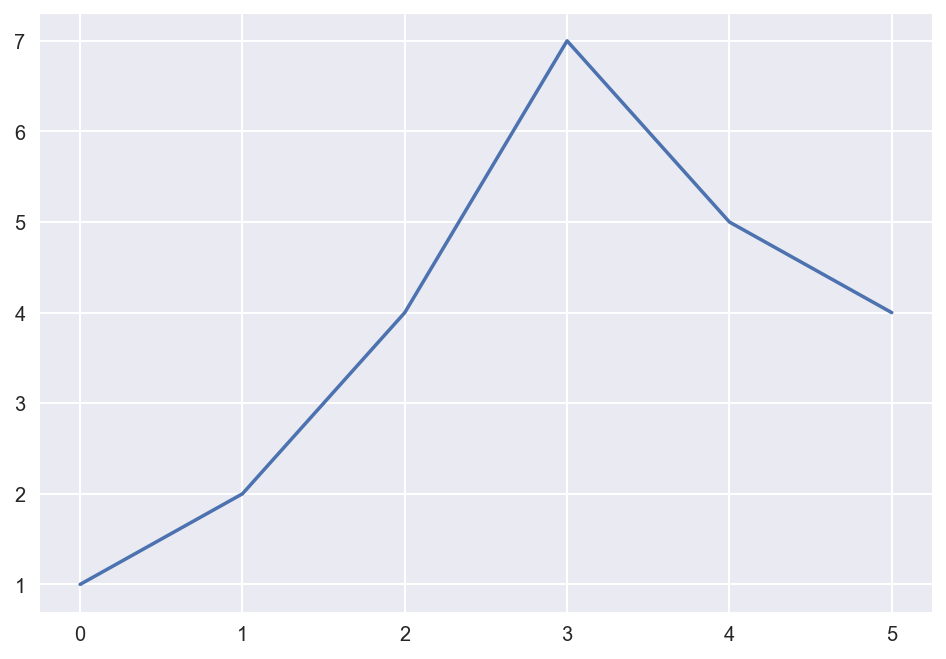

In [2]:
plt.plot([1, 2, 4, 7, 5, 4])
plt.show(); 

So, it's as simple as calling the `plot` function with some data, and then calling the `show` function. If the `plot` function is given one array of data, it will use it as the coordinates on the vertical axis, and it will just use each data point's index in the array as the horizontal coordinate.

You can also provide two arrays: one for the horizontal axis `x`, and the second for the vertical axis `y`.

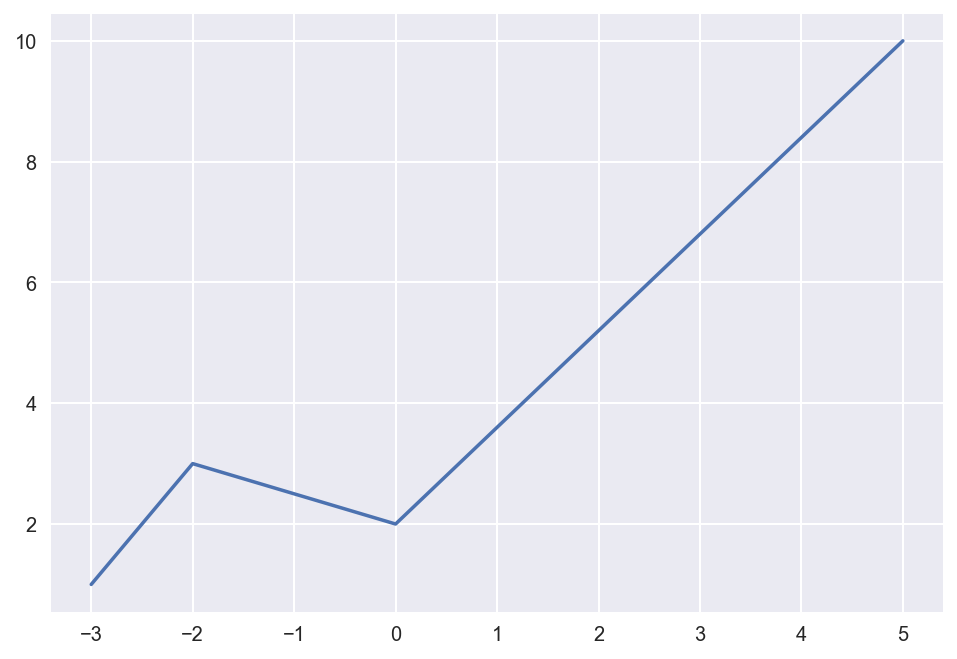

In [3]:
plt.plot([-3, -2, 0, 5], [1, 3, 2, 10])
plt.show();

The axes automatically match the extent of the data.  We would like to give the graph a bit more room, so let's call the `xlim` and `ylim`functions to change the extent of each axis. Here, you can also specify a value of "None" for the default limit.

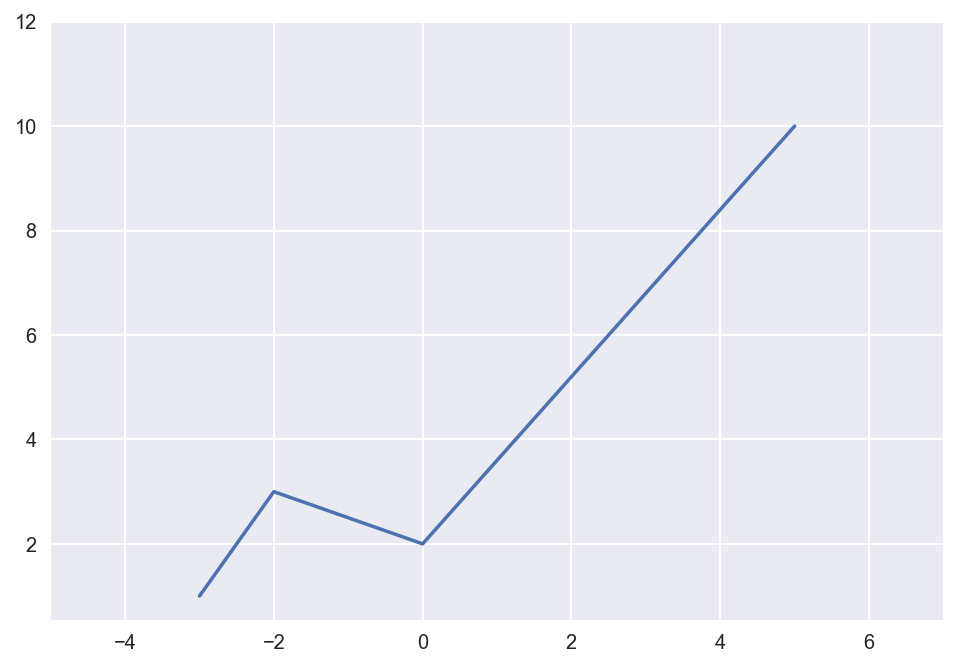

In [4]:
plt.plot([-3, -2, 0, 5], [1, 3, 2, 10])
plt.xlim(-5, 7)
plt.ylim(None, 12)
plt.show();

Now, let's plot a mathematical function. We use NumPy's `linspace` function to create an array `x` containing 500 floats ranging from -2 to 2, then we create a second array `y` computed as the square of `x`. While at it, we change the color to `blue` from the default style color `red`.

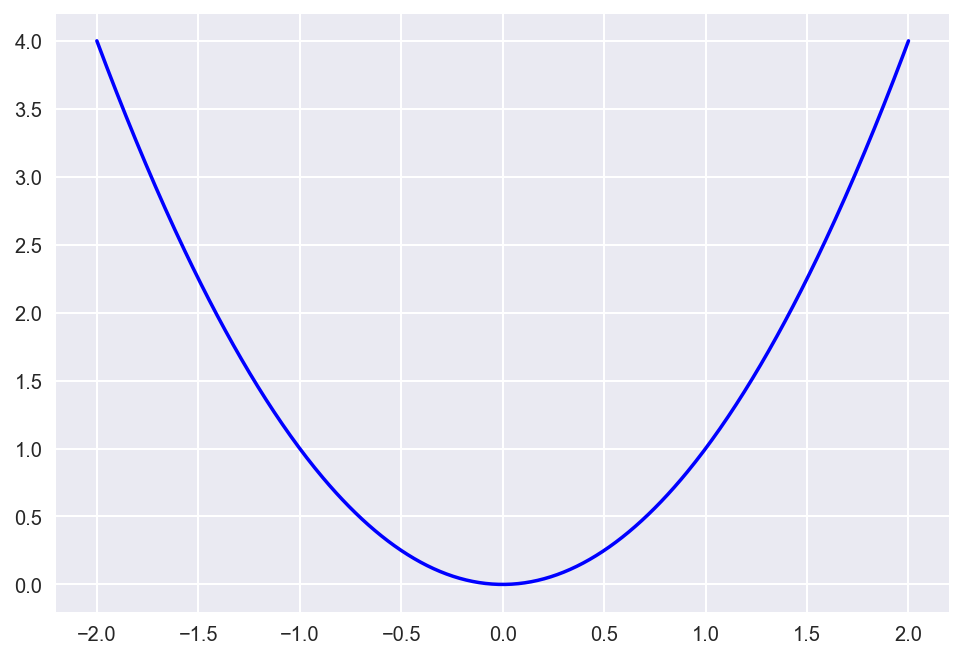

In [5]:
x = np.linspace(-2, 2, 500)
y = x**2
plt.plot(x, y, color='blue')
plt.show();

## Changing figure size & adding labels

To change the size of the plot, please see below where the figure size is assumed to be in inches.

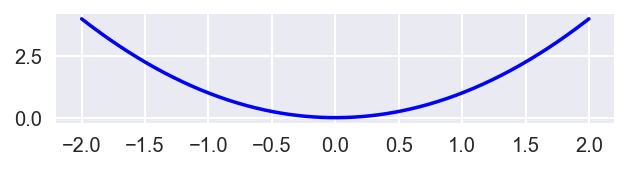

In [6]:
plt.figure(figsize = (5, 1))
plt.plot(x, y, color='blue')
plt.show();

The plot above is a bit dry, so let's add a title, x and y labels, and also draw a grid. 

In this particular case, since we are using the `seaborn` style, we get the grid for free, but in the default case, you can use the `grid` function for displaying a grid.

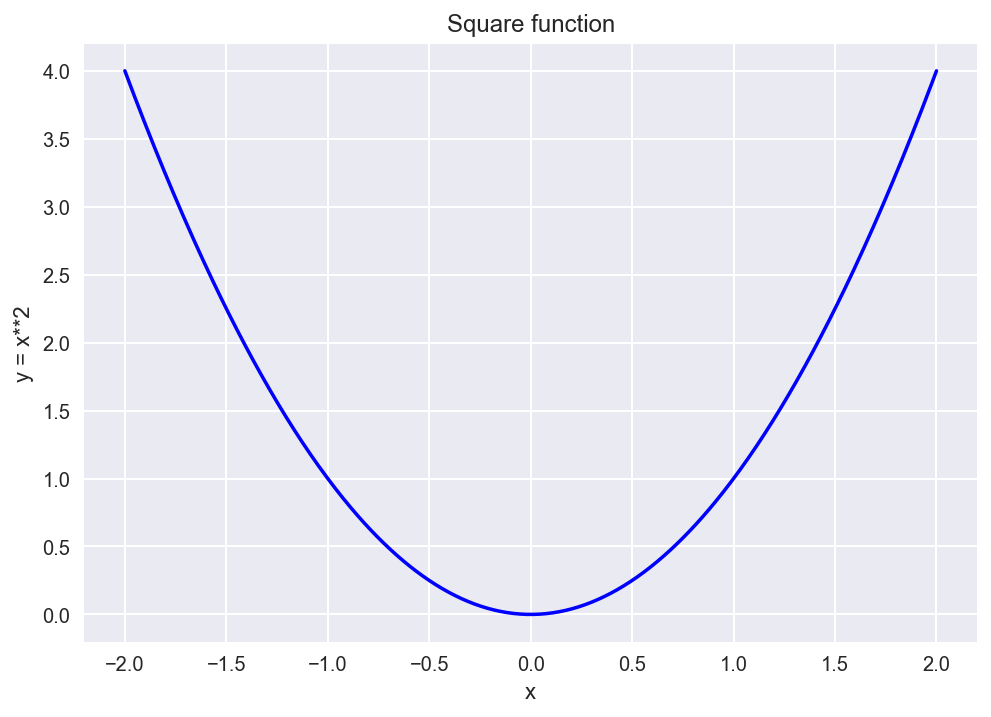

In [7]:
plt.plot(x, y, color='blue')
plt.title("Square function")
plt.xlabel("x")
plt.ylabel("y = x**2")
plt.grid(True)
plt.show();

## Line style and color

By default, matplotlib draws a line between consecutive points. You can pass a 3rd argument to change the line's style and color. For example `"b--"` means "blue dashed line".

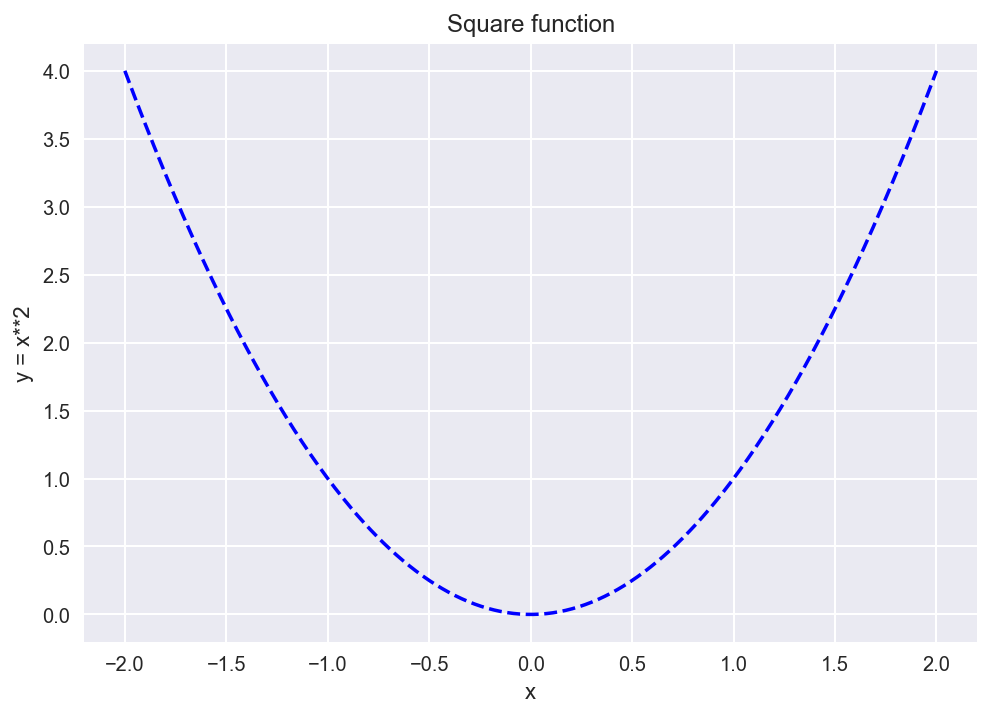

In [8]:
plt.plot(x, y, 'b--')
plt.title("Square function")
plt.xlabel("x")
plt.ylabel("y = x**2")
plt.show();

You can easily plot multiple lines on one graph. You simply call `plot` multiple times before calling `show`. 

You can also draw simple points instead of lines. Here's an example with green dashes, red dotted line and blue triangles.

Check out [the documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) for the full list of style & color options.

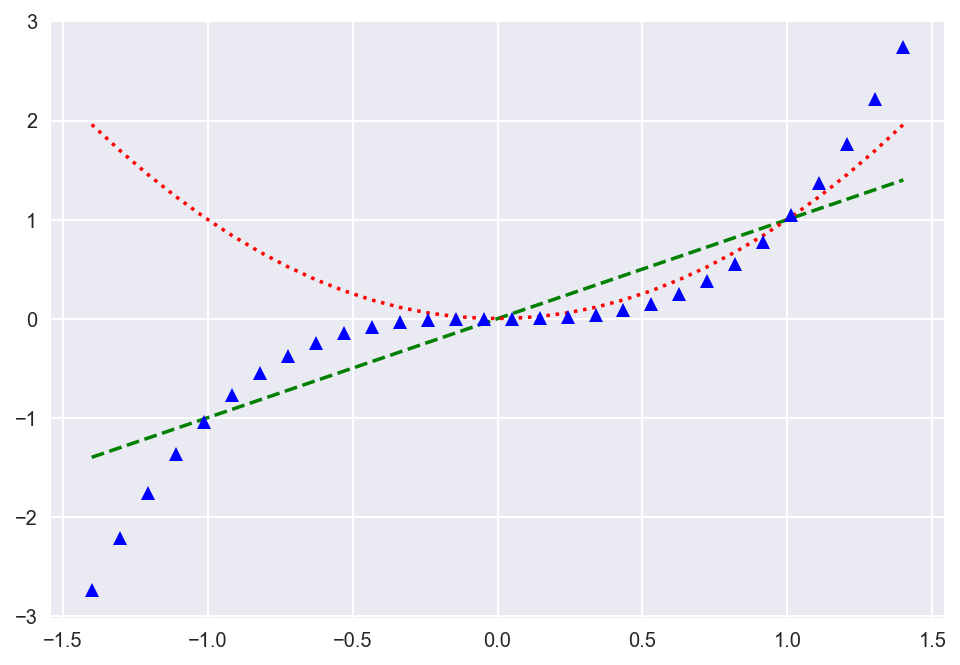

In [9]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x, 'g--')
plt.plot(x, x**2, 'r:')
plt.plot(x, x**3, 'b^')
plt.show();

For each plot line, you can set extra attributes, such as the line width, the dash style, or the alpha level. See the full list of attributes in [the documentation](http://matplotlib.org/users/pyplot_tutorial.html#controlling-line-properties). You can also overwrite the current style's grid options using the `grid` function.

## Subplots

A `Matplotlib` figure may contain multiple subplots. These subplots are organized in a grid. To create a subplot, just call the `subplot` function, specify the number of rows and columns in the figure, and the index of the subplot you want to draw on (starting from 1, then left to right, and top to bottom).

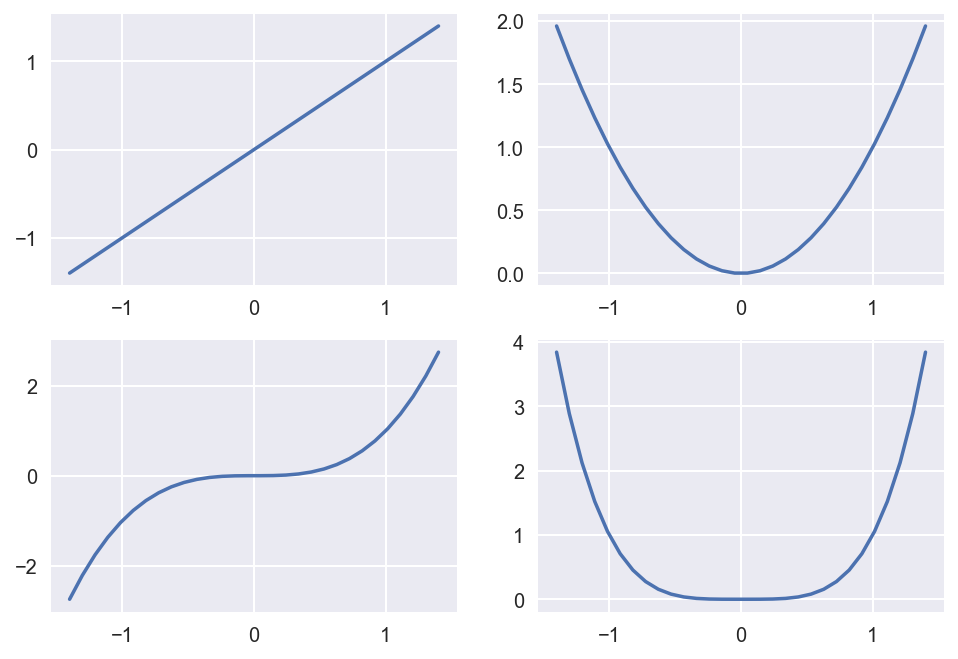

In [10]:
x = np.linspace(-1.4, 1.4, 30)
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot = bottow left
plt.plot(x, x**3)
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot = bottom right
plt.plot(x, x**4)
plt.show();

It is easy to create subplots that span across multiple grid cells.

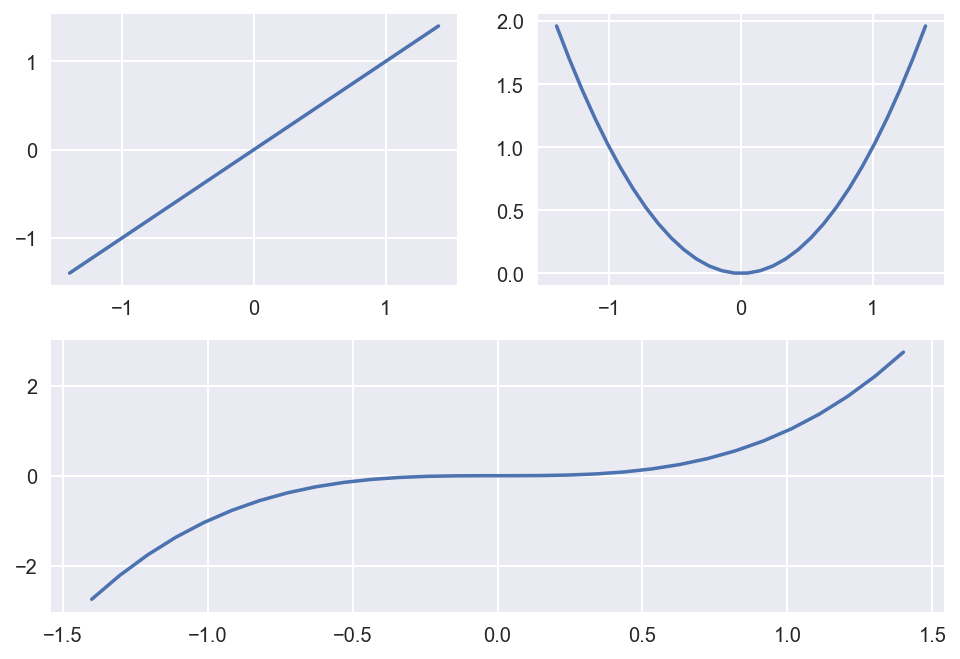

In [11]:
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
plt.plot(x, x)
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
plt.plot(x, x**2)
plt.subplot(2, 1, 2)  # 2 rows, *1* column, 2nd subplot = bottom
plt.plot(x, x**3)
plt.show();

If you need even more flexibility in subplot positioning, check out the [GridSpec documentation](http://matplotlib.org/users/gridspec.html).

## Text and annotations

You can call `text` to add text at any location in the graph. Just specify the horizontal and vertical coordinates and the text, and optionally some extra attributes.  Any text in matplotlib may contain TeX equation expressions, see [the documentation](http://matplotlib.org/users/mathtext.html) for more details. Below, `ha` is an alias for `horizontalalignment`.

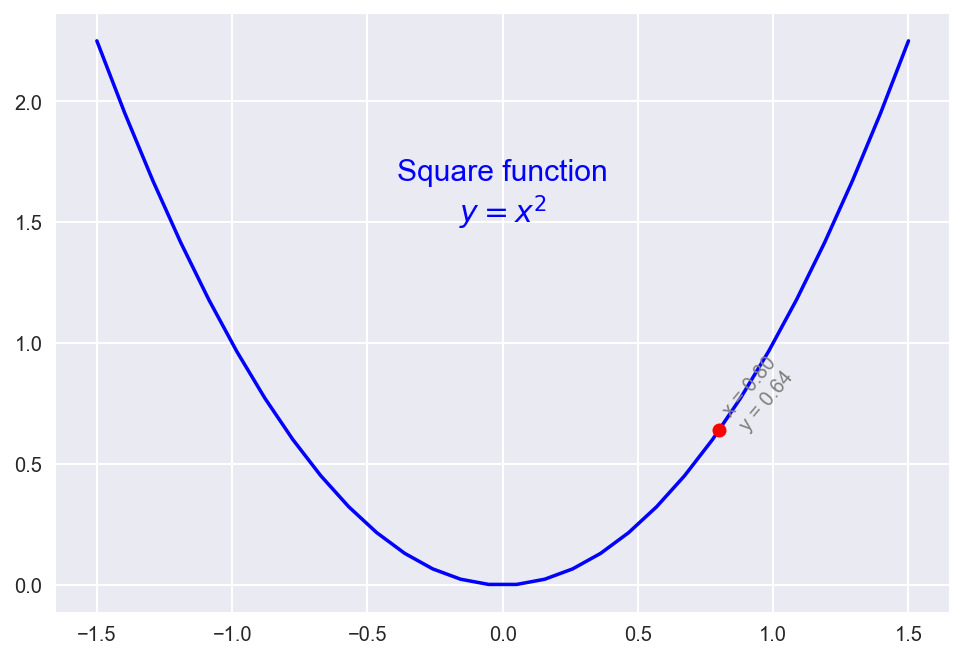

In [12]:
x = np.linspace(-1.5, 1.5, 30)
px = 0.8
py = px**2

plt.plot(x, x**2, "b-", px, py, "ro")

plt.text(0, 1.5, "Square function\n$y = x^2$", fontsize=15, color='blue', horizontalalignment="center")
plt.text(px, py, "x = %0.2f\ny = %0.2f"%(px, py), rotation=50, color='gray')

plt.show();

For more text properties, visit [the documentation](http://matplotlib.org/users/text_props.html#text-properties).

## Labels and legends

The simplest way to add a legend is to set a label on all lines, then just call the `legend` function.

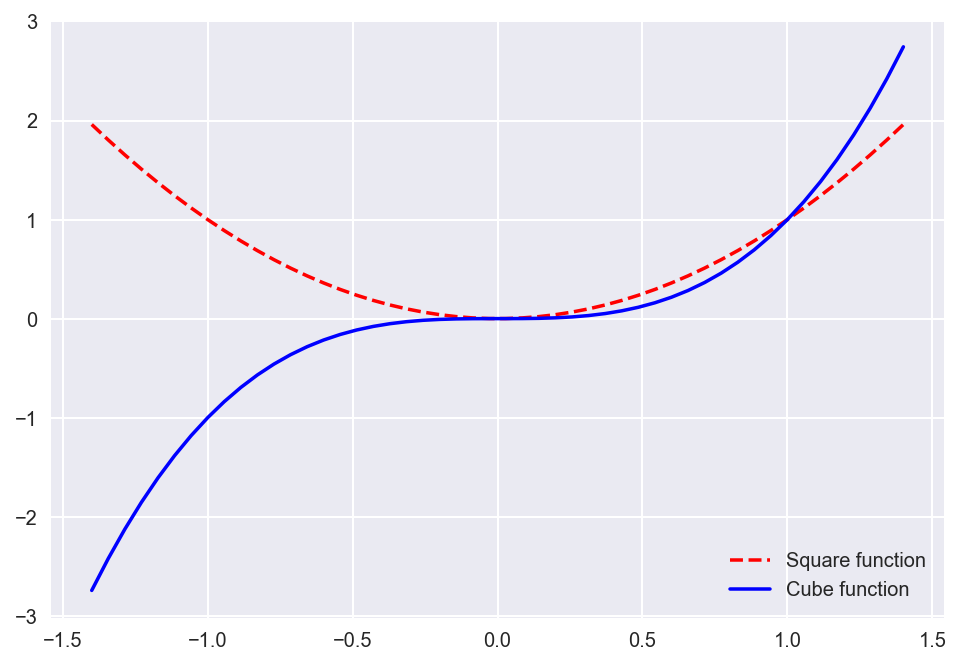

In [13]:
x = np.linspace(-1.4, 1.4, 50)
plt.plot(x, x**2, "r--", label="Square function")
plt.plot(x, x**3, "b-", label="Cube function")
plt.legend(loc="lower right")
plt.show();

## Lines
You can draw lines simply using the `plot` function. However, it is often convenient to create a utility function that plots a (seemingly) infinite line across the graph, given a slope and an intercept. You can also use the `hlines` and `vlines` functions that plot horizontal and vertical line segments.

C:\Users\akman\AppData\Local\Temp/ipykernel_8516/385940994.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(1, 0, "ro", color='black')


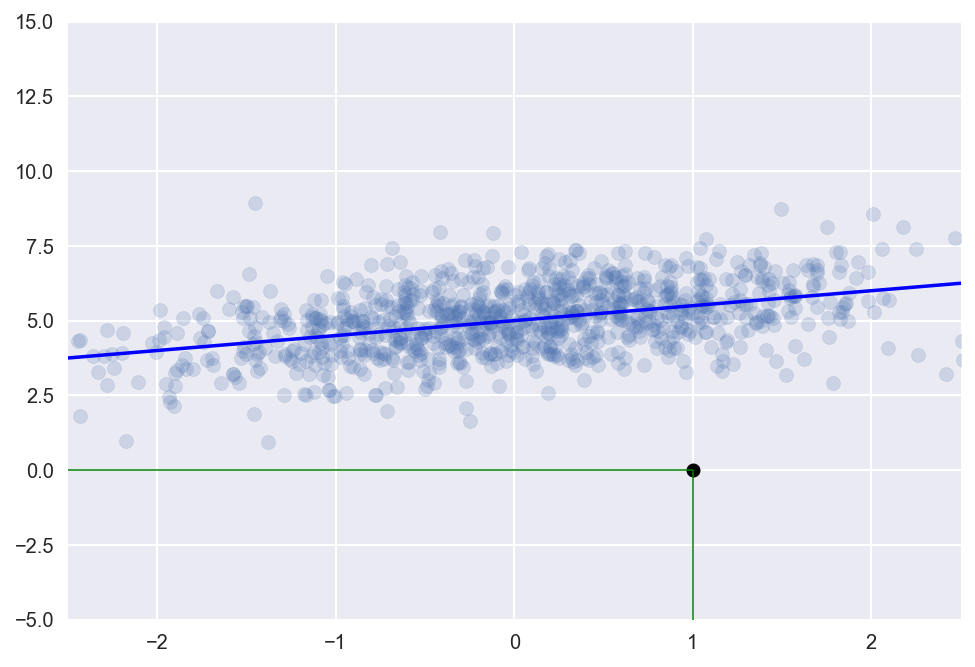

In [14]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)

x = np.random.randn(1000)
y = 0.5*x + 5 + np.random.randn(1000)
plt.axis([-2.5, 2.5, -5, 15])
plt.scatter(x, y, alpha=0.2)
plt.plot(1, 0, "ro", color='black')
plt.vlines(1, -5, 0, color="green", linewidth=0.75)
plt.hlines(0, -2.5, 1, color="green", linewidth=0.75)
plot_line(axis=plt.gca(), slope=0.5, intercept=5, color="blue")
plt.grid(True)
plt.show();

## Histograms

You can plot histograms using the `hist` function.

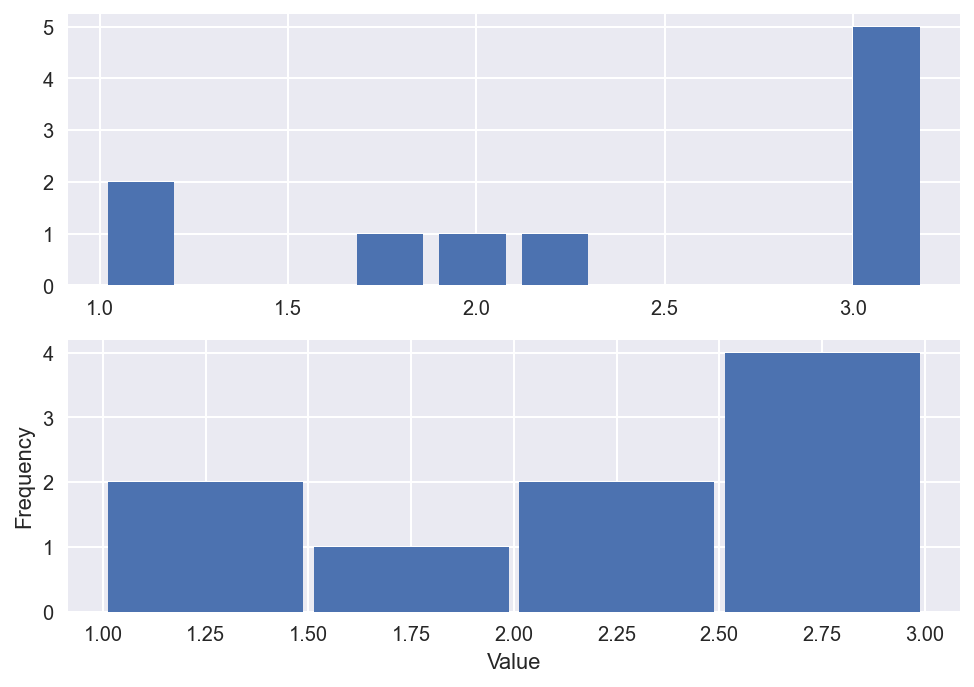

In [15]:
data = [1, 1.1, 1.8, 2, 2.1, 3.2, 3, 3, 3, 3]
plt.subplot(2,1,1)
plt.hist(data, bins = 10, rwidth=0.8)

plt.subplot(2,1,2)
plt.hist(data, bins = [1, 1.5, 2, 2.5, 3], rwidth=0.95)
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.show();

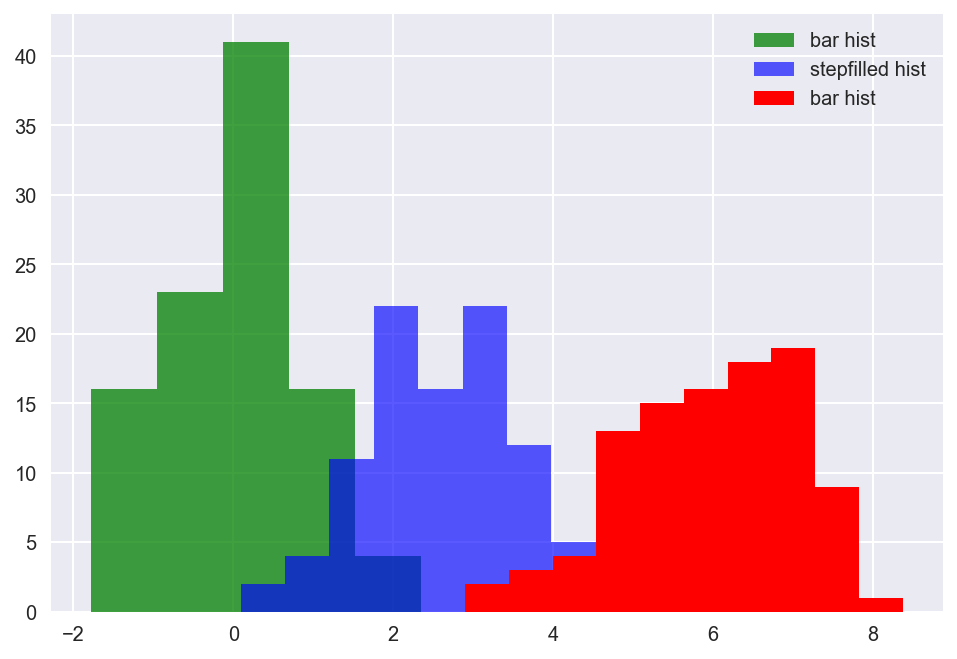

In [16]:
data1 = np.random.randn(100)
data2 = np.random.randn(100) + 3
data3 = np.random.randn(100) + 6

plt.hist(data1, bins=5, color='g', alpha=0.75, label='bar hist') # default histtype='bar'
plt.hist(data2, color='b', alpha=0.65, histtype='stepfilled', label='stepfilled hist')
plt.hist(data3, color='r', label='bar hist')

plt.legend()
plt.show();

## Scatterplots

To draw a scatterplot, simply provide the x and y coordinates of the points and call the `scatter` function.

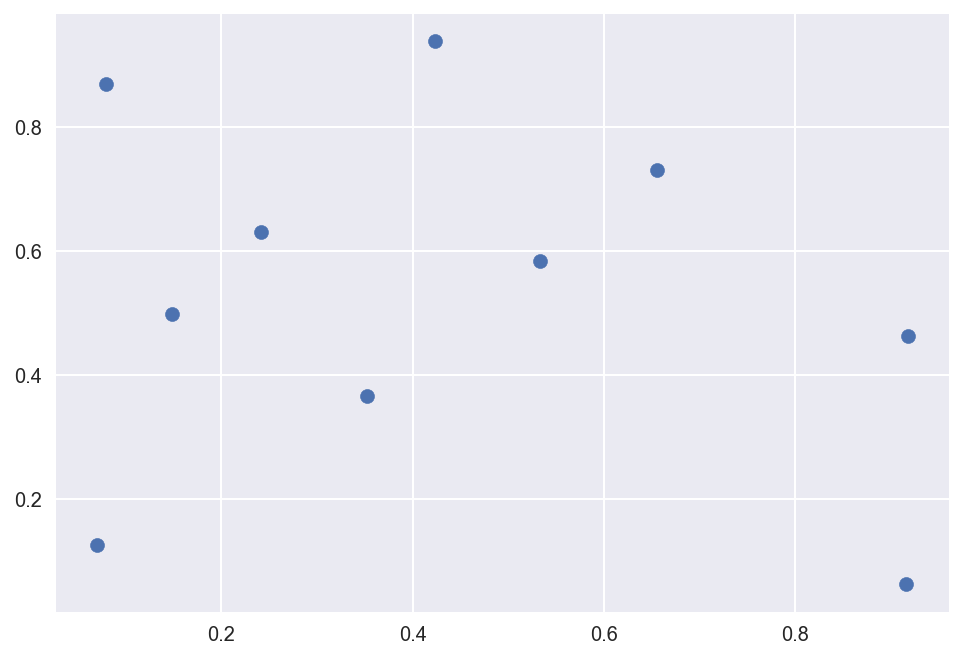

In [17]:
x, y = np.random.rand(2, 10)
plt.scatter(x, y)
plt.show();

You may also optionally specify the scale of each point.

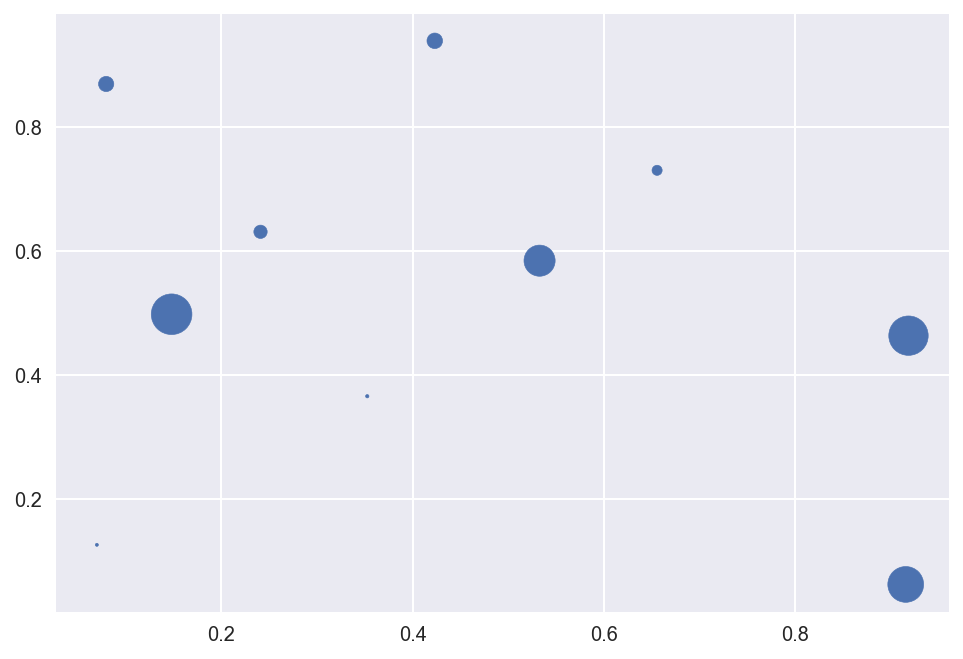

In [18]:
scale = np.random.rand(10)
scale = 500 * scale ** 2
plt.scatter(x, y, s=scale)
plt.show();

As usual, there are a number of other attributes you can set, such as the fill and edge colors and the alpha level.

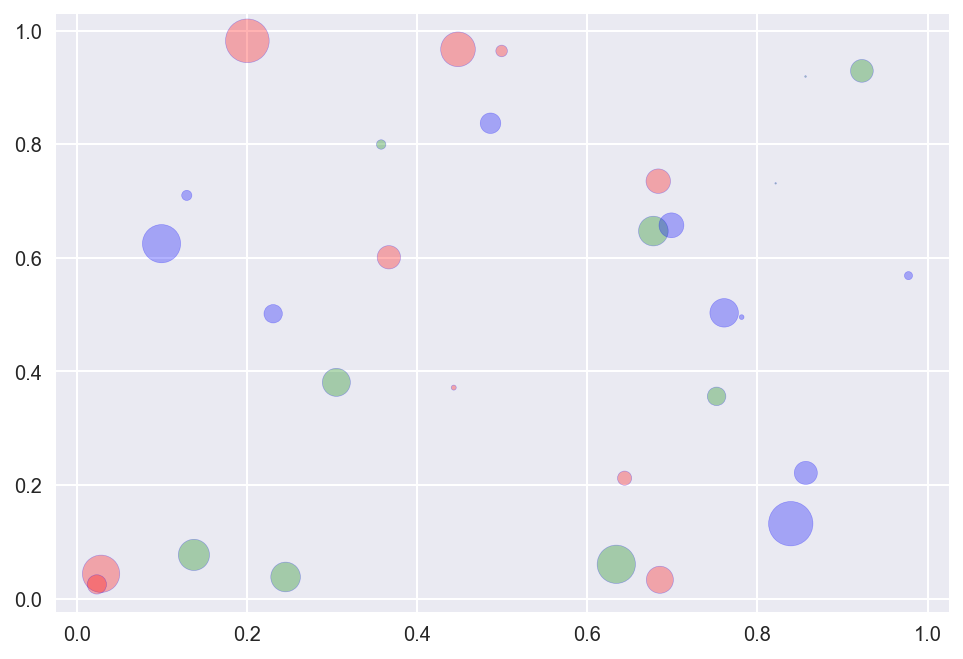

In [19]:
for color in ['red', 'green', 'blue']:
    n = 10
    x, y = np.random.rand(2, n)
    scale = 500.0 * np.random.rand(n) ** 2
    plt.scatter(x, y, s=scale, c=color, alpha=0.3, edgecolors='blue')

plt.show();

## Boxplots

Boxplots can be displayed using the `boxplot` function.

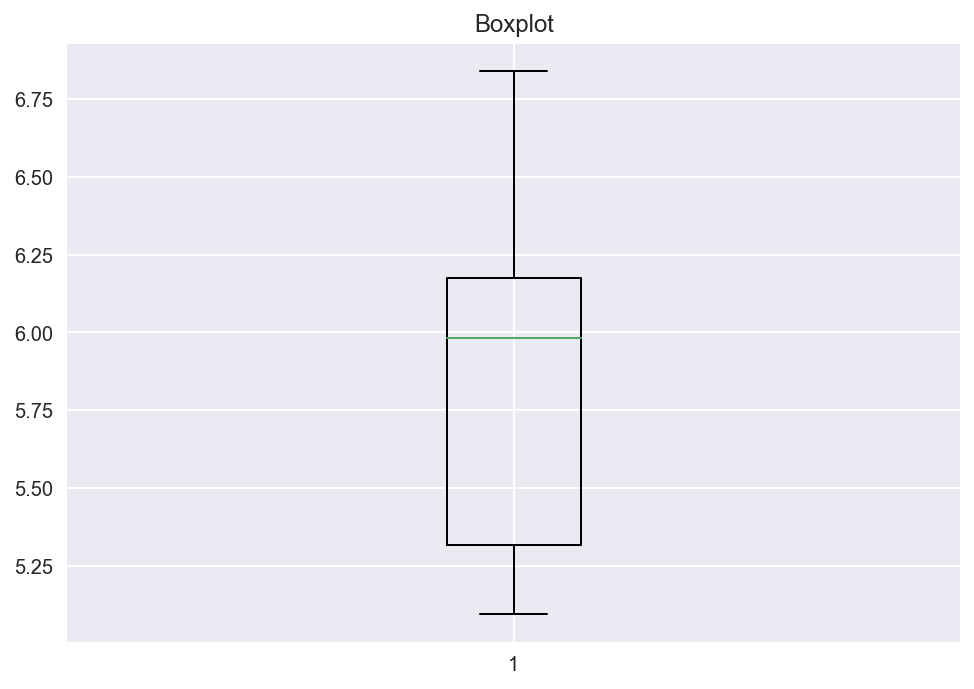

In [20]:
data1 = np.random.rand(10)*2 + 5
plt.boxplot(x=data1)
plt.title("Boxplot")
plt.show();

## Saving a figure

Saving a figure to disk is as simple as calling [`savefig`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig) with the name of the file (or a file object). The available image formats depend on the graphics backend you use.

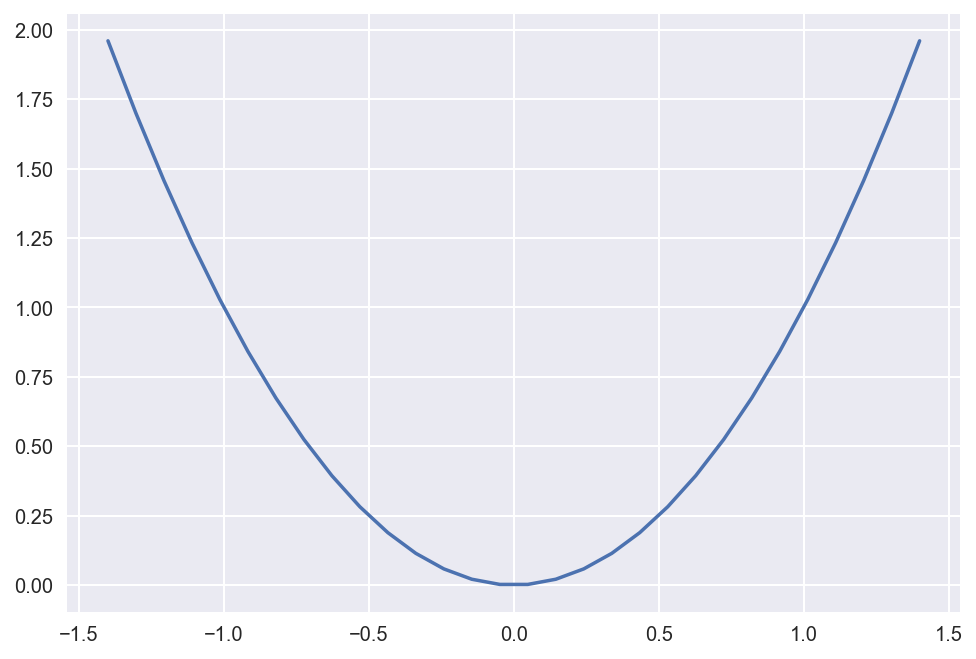

In [21]:
x = np.linspace(-1.4, 1.4, 30)
plt.plot(x, x**2)
plt.savefig("my_square_function.png", transparent=True);

## Exercises

Using records of undergraduate degrees awarded to women in a variety of fields from 1970 to 2011, compare trends in degrees most easily by viewing two curves on the same set of axes:

You should first create three NumPy arrays for the following ones: 
- *year* (which enumerates years from 1970 to 2011 inclusive),
- *physical_sciences* (which represents the percentage of Physical Sciences degrees awarded to women each in corresponding year),
```python
# Use the following values for physical_sciences
physical_sciences = [13.8, 14.9, 14.8, 16.5, 18.2, 19.1, 20, 21.3, 22.5, 23.7, 24.6, 25.7, 27.3, 27.6, 28, 27.5, 28.4, 30.4, 29.7, 31.3, 31.6, 32.6, 32.6, 33.6, 34.8, 35.9, 37.3, 38.3, 39.7, 40.2, 41, 42.2, 41.1, 41.7, 42.1, 41.6, 40.8, 40.7, 40.7, 40.7, 40.2, 40.1]
```
- *computer_science* (which represents the percentage of Computer Science degrees awarded to women in each corresponding year).
```python
# Use the following values for computer_science
computer_science = [13.6, 13.6, 14.9, 16.4, 18.9, 19.8, 23.9, 25.7, 28.1, 30.2, 32.5, 34.8, 36.3, 37.1, 36.8, 35.7, 34.7, 32.4, 30.8, 29.9, 29.4, 28.7, 28.2, 28.5, 28.5, 27.5, 27.1, 26.8, 27, 28.1, 27.7, 27.6, 27, 25.1, 22.2, 20.6, 18.6, 17.6, 17.8, 18.1, 17.6, 18.2]
```

1. Create two `plt.plot` commands to draw line plots of different colors on the same set of axes(`year` represents the x-axis, while `physical_sciences` and `computer_science` are the y-axes):

2. Add a `blue` line plot of the % of degrees awarded to women in the Physical Sciences from 1970 to 2011.<br>**HINT**: the x-axis should be specified first.

3. Add a `red` line plot of the % of degrees awarded to women in Computer Science from 1970 to 2011.

4. Use `plt.subplot` to create a figure with 1x2 subplot layout & make the first subplot active.

5. Plot the percentage of degrees awarded to women in Physical Sciences in `blue` in the active subplot.

6. Use `plt.subplot` again to make the second subplot active in the current 1x2 subplot grid.

7. Plot the percentage of degrees awarded to women in Computer Science in `red` in the active subplot.

8. Add labels and title.

9. Add a legend at the lower center.

10. Save the output to "scientist_women.png".

### Possible solutions

``` python
# Import numpy
import numpy as np

# Create NumPy arrays for three variables
physical_sciences = np.array([13.8, 14.9, 14.8, 16.5, 18.2, 19.1, 20. , 21.3, 22.5, 23.7, 24.6, 25.7, 27.3, 27.6, 28. , 27.5, 28.4, 30.4, 29.7, 31.3, 31.6, 32.6, 32.6, 33.6, 34.8, 35.9, 37.3, 38.3, 39.7, 40.2, 41. , 42.2, 41.1, 41.7, 42.1, 41.6, 40.8, 40.7, 40.7, 40.7, 40.2, 40.1])
computer_science = np.array([13.6, 13.6, 14.9, 16.4, 18.9, 19.8, 23.9, 25.7, 28.1, 30.2, 32.5, 34.8, 36.3, 37.1, 36.8, 35.7, 34.7, 32.4, 30.8, 29.9, 29.4, 28.7, 28.2, 28.5, 28.5, 27.5, 27.1, 26.8, 27, 28.1, 27.7, 27.6, 27, 25.1, 22.2, 20.6, 18.6, 17.6, 17.8, 18.1, 17.6, 18.2])
year = np.arange(1970, 2012)

# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color = 'blue')

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color = 'red')

# Display the plot
plt.show()

# Create a figure with 1x2 subplot and make the left subplot active
plt.subplot(1, 2, 1) 

# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')

# Make the right subplot active in the current 1x2 subplot grid
plt.subplot(1, 2, 2)

# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')

# Use plt.tight_layout() to improve the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show();

# Plot the % of degrees awarded to women in Computer Science and the Physical Sciences
plt.plot(year,computer_science, color='red') 
plt.plot(year, physical_sciences, color='blue')

# Add the axis labels
plt.xlabel('Year')
plt.ylabel('Degrees awarded (%)')

# Add a title and display the plot
plt.title('Degrees awarded to women (1990-2010)')

# Specify the label 'Computer Science'
plt.plot(year, computer_science, color='red', label='Computer Science') 

# Specify the label 'Physical Sciences' 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')

# Add a legend at the lower center
plt.legend(loc='lower center')

# Save the image as 'scientist_women.png'
plt.savefig("scientist_women.png")
```

***
www.featureranking.com